In [32]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import statsmodels.api as sm
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

# I- Calcul vol via high-low + Estim H 

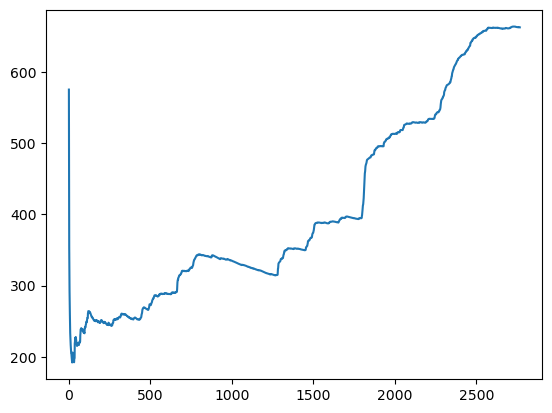

In [98]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['Plus Haut'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Plus Bas'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)

daily_difference = data['Plus Haut'] - data['Plus Bas']

data.set_index('Date', inplace=True)

squared_returns = daily_difference ** 2

int_vol = list(squared_returns.cumsum())
n = len(int_vol)
vol_prox = []
for t in range(n):
    vol_prox.append(np.sqrt(int_vol[t]*252/(1+t)))
plt.plot(vol_prox)
vol_1 = pd.DataFrame(list(map(np.log, vol_prox)))





In [99]:
echelles_temps = range(2, 50)
q_values = list(np.linspace(0.5,1.5,6))  # Différentes valeurs de q

m_values = {q: [] for q in q_values}
delta_values = []

for delta in echelles_temps:
    for q in q_values:
        # Calcul de m(q, Delta) pour chaque q et Delta
        mq_delta = np.mean(np.abs(vol_1.diff(periods=delta))**q)
        m_values[q].append(mq_delta)
    
    delta_values.append(delta)

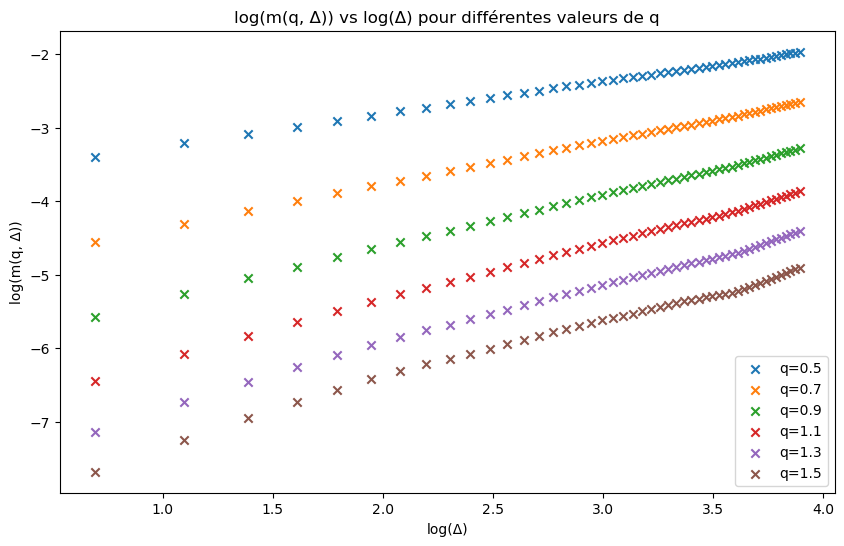

In [100]:
plt.figure(figsize=(10, 6))
for q in q_values:
    plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

plt.xlabel('log(Δ)')
plt.ylabel('log(m(q, Δ))')
plt.title('log(m(q, Δ)) vs log(Δ) pour différentes valeurs de q')
plt.legend()
plt.show()

Estimation du coefficient de Hurst, H: 0.3561383341475407
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     24.12
Date:                Wed, 17 Apr 2024   Prob (F-statistic):            0.00798
Time:                        15:48:17   Log-Likelihood:                 9.5167
No. Observations:                   6   AIC:                            -15.03
Df Residuals:                       4   BIC:                            -15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/mamba/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


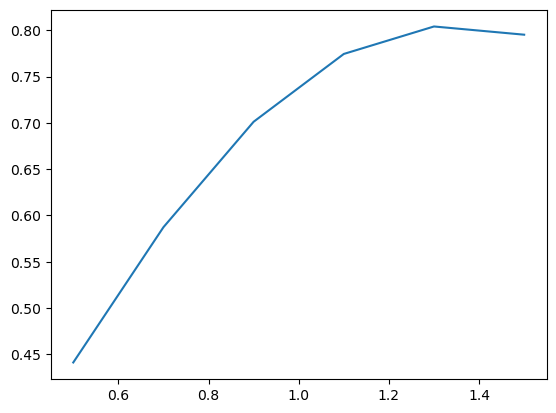

In [101]:
log_delta = np.log(delta_values)
log_m_values = {q: np.log(m) for q, m in m_values.items()}

# Étape 1: Régression de log(m) contre log(delta) pour chaque q
slopes = []
for q in q_values:
    X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
    model = sm.OLS(log_m_values[q], X).fit()
    slopes.append(model.params[1])  # Récupérer le coefficient de pente

plt.plot(q_values, slopes)
# Étape 2: Régression des coefficients (slopes) contre q
X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
model_h = sm.OLS(slopes, X).fit()
H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

print(f"Estimation du coefficient de Hurst, H: {H}")

print(model_h.summary())

# II- Calcul vol close-open + Estim H 

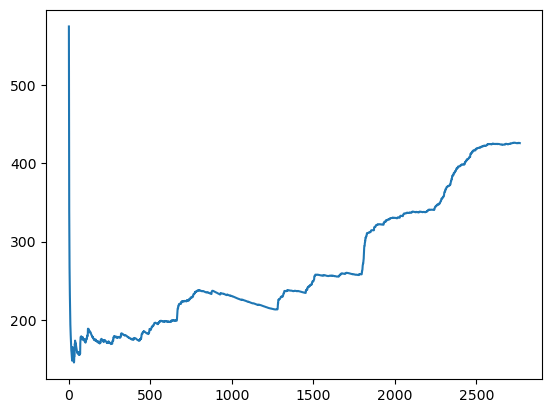

In [110]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')
data['Dernier'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Ouv.'] = data['Ouv.'].str.replace('.', '').str.replace(',', '.').astype(float)

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)

daily_difference = data['Dernier'] - data['Ouv.']

data.set_index('Date', inplace=True)

squared_returns = daily_difference ** 2

int_vol = list(squared_returns.cumsum())
n = len(int_vol)
vol_prox = []
for t in range(n):
    vol_prox.append(np.sqrt(int_vol[t]*252/(1+t)))
plt.plot(vol_prox)
vol_2 = pd.DataFrame(list(map(np.log, vol_prox)))

In [111]:
echelles_temps = range(2, 50)
q_values = list(np.linspace(0.5,1.5,6))  # Différentes valeurs de q

m_values = {q: [] for q in q_values}
delta_values = []

for delta in echelles_temps:
    for q in q_values:
        # Calcul de m(q, Delta) pour chaque q et Delta
        mq_delta = np.mean(np.abs(vol_2.diff(periods=delta))**q)
        m_values[q].append(mq_delta)
    
    delta_values.append(delta)

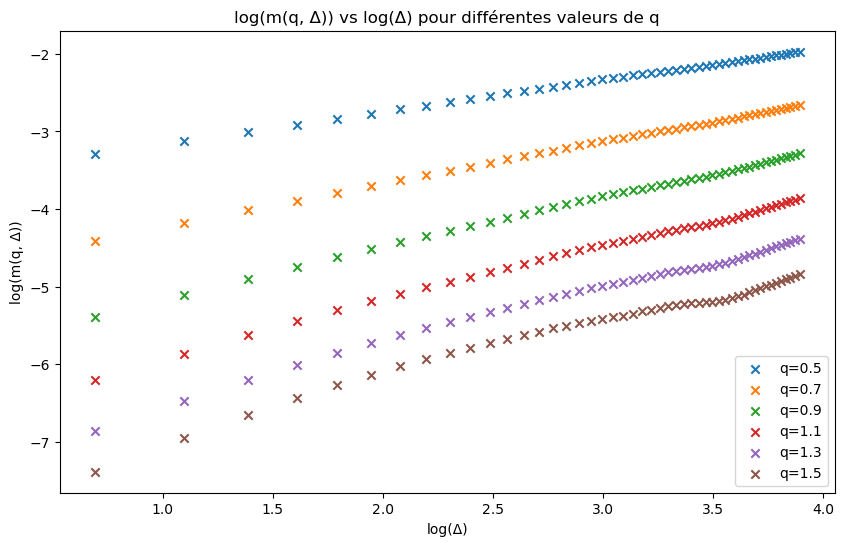

In [112]:
plt.figure(figsize=(10, 6))
for q in q_values:
    plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

plt.xlabel('log(Δ)')
plt.ylabel('log(m(q, Δ))')
plt.title('log(m(q, Δ)) vs log(Δ) pour différentes valeurs de q')
plt.legend()
plt.show()

Estimation du coefficient de Hurst, H: 0.285218868836016
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     18.25
Date:                Wed, 17 Apr 2024   Prob (F-statistic):             0.0129
Time:                        15:49:36   Log-Likelihood:                 10.012
No. Observations:                   6   AIC:                            -16.02
Df Residuals:                       4   BIC:                            -16.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/opt/mamba/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


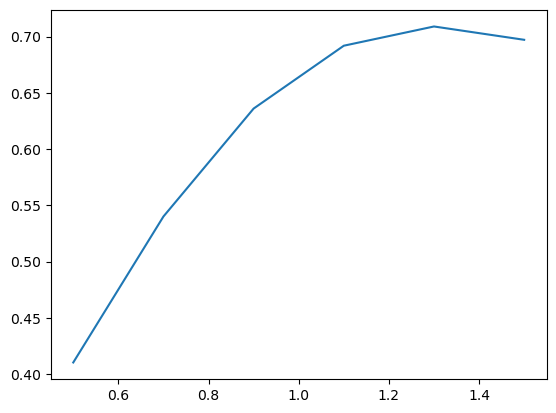

In [113]:
log_delta = np.log(delta_values)
log_m_values = {q: np.log(m) for q, m in m_values.items()}

# Étape 1: Régression de log(m) contre log(delta) pour chaque q
slopes = []
for q in q_values:
    X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
    model = sm.OLS(log_m_values[q], X).fit()
    slopes.append(model.params[1])  # Récupérer le coefficient de pente

plt.plot(q_values, slopes)
# Étape 2: Régression des coefficients (slopes) contre q
X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
model_h = sm.OLS(slopes, X).fit()
H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

print(f"Estimation du coefficient de Hurst, H: {H}")

print(model_h.summary())

# III-Calcul vol via mesure de Garman and Klass (1980) (considère pas de drift dans les prix)

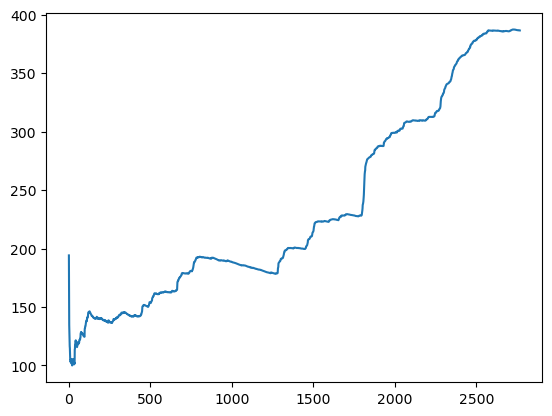

In [114]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['High'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Low'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Close'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Open'] = data['Ouv.'].str.replace('.', '').str.replace(',', '.').astype(float)


data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)


data.set_index('Date', inplace=True)

squared_returns = ((data['High']- data['Low'])**2)/2 - (2*m.log(2)-1)*((data['Close']-data['Open'])**2)

int_vol = list(squared_returns.cumsum())
n = len(int_vol)
vol_prox = []
for t in range(n):
    vol_prox.append(np.sqrt(int_vol[t]*252/(1+t)))
plt.plot(vol_prox)
vol_3 = pd.DataFrame(list(map(np.log, vol_prox)))

In [115]:
echelles_temps = range(2, 50)
q_values = list(np.linspace(0.5,1.5,6))  # Différentes valeurs de q

m_values = {q: [] for q in q_values}
delta_values = []

for delta in echelles_temps:
    for q in q_values:
        # Calcul de m(q, Delta) pour chaque q et Delta
        mq_delta = np.mean(np.abs(vol_3.diff(periods=delta))**q)
        m_values[q].append(mq_delta)
    
    delta_values.append(delta)

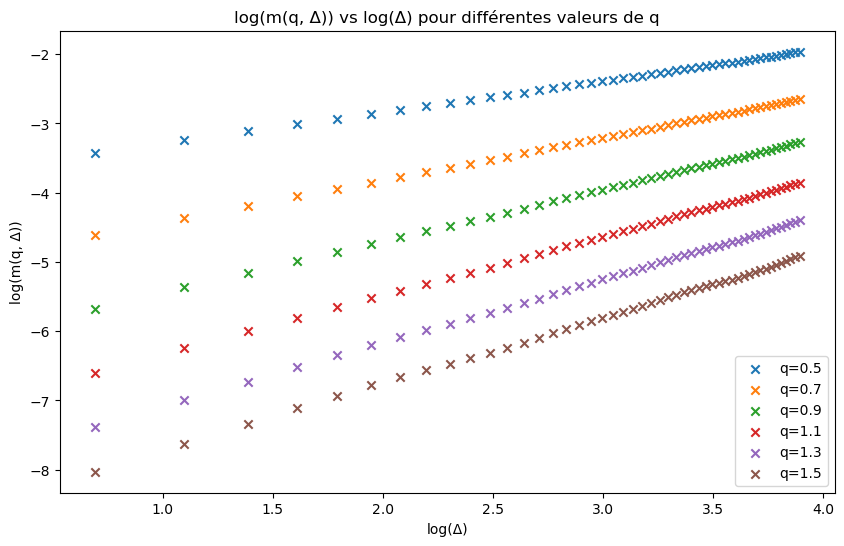

In [116]:
plt.figure(figsize=(10, 6))
for q in q_values:
    plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

plt.xlabel('log(Δ)')
plt.ylabel('log(m(q, Δ))')
plt.title('log(m(q, Δ)) vs log(Δ) pour différentes valeurs de q')
plt.legend()
plt.show()

Estimation du coefficient de Hurst, H: 0.5072006984889554
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     77.91
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           0.000909
Time:                        15:49:53   Log-Likelihood:                 10.913
No. Observations:                   6   AIC:                            -17.83
Df Residuals:                       4   BIC:                            -18.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/mamba/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


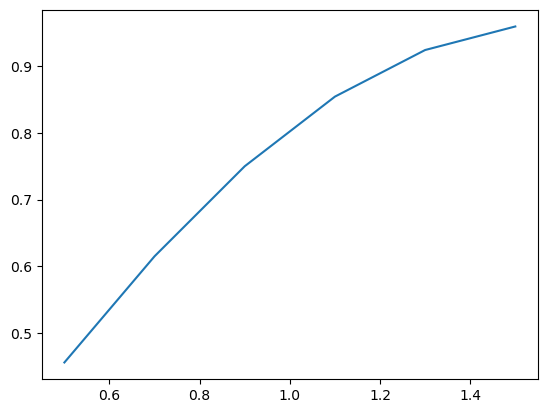

In [117]:
log_delta = np.log(delta_values)
log_m_values = {q: np.log(m) for q, m in m_values.items()}

# Étape 1: Régression de log(m) contre log(delta) pour chaque q
slopes = []
for q in q_values:
    X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
    model = sm.OLS(log_m_values[q], X).fit()
    slopes.append(model.params[1])  # Récupérer le coefficient de pente

plt.plot(q_values, slopes)
# Étape 2: Régression des coefficients (slopes) contre q
X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
model_h = sm.OLS(slopes, X).fit()
H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

print(f"Estimation du coefficient de Hurst, H: {H}")

print(model_h.summary())

# IV-Calcul vol via mesure Parkinson (1980) (considère un BM géom sans drift dans les prix)

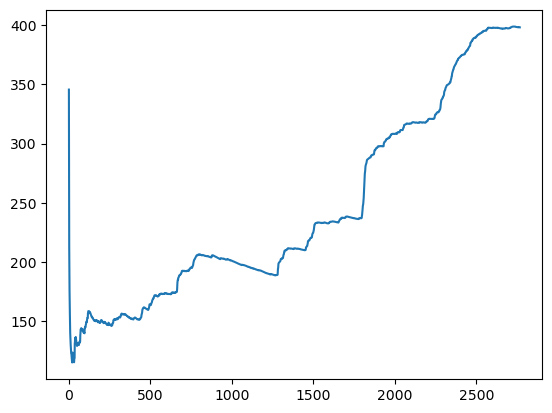

In [118]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['High'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Low'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)


data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)


data.set_index('Date', inplace=True)

squared_returns = (.361)*((data['High']- data['Low'])**2)

int_vol = list(squared_returns.cumsum())
n = len(int_vol)
vol_prox = []
for t in range(n):
    vol_prox.append(np.sqrt(int_vol[t]*252/(1+t)))
plt.plot(vol_prox)
vol_4 = pd.DataFrame(list(map(np.log, vol_prox)))

In [119]:
echelles_temps = range(2, 50)
q_values = list(np.linspace(0.5,1.5,6))  # Différentes valeurs de q

m_values = {q: [] for q in q_values}
delta_values = []

for delta in echelles_temps:
    for q in q_values:
        # Calcul de m(q, Delta) pour chaque q et Delta
        mq_delta = np.mean(np.abs(vol_4.diff(periods=delta))**q)
        m_values[q].append(mq_delta)
    
    delta_values.append(delta)

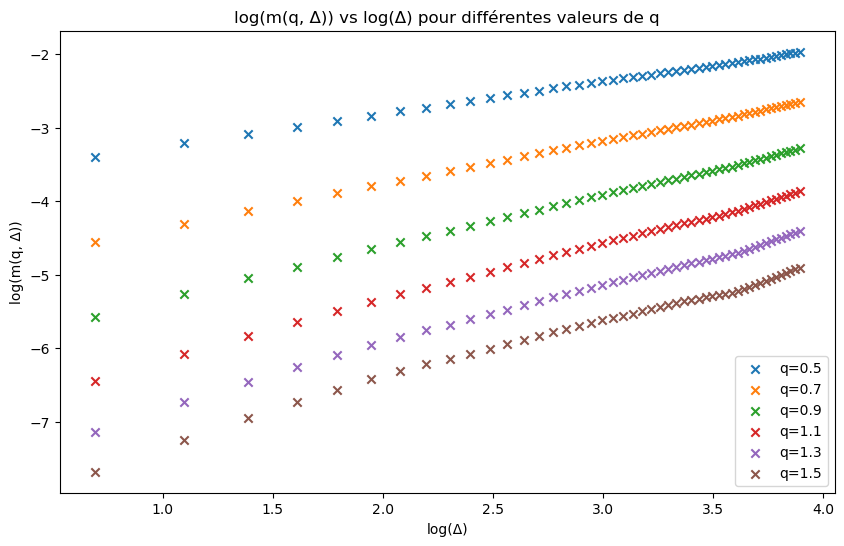

In [120]:
plt.figure(figsize=(10, 6))
for q in q_values:
    plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

plt.xlabel('log(Δ)')
plt.ylabel('log(m(q, Δ))')
plt.title('log(m(q, Δ)) vs log(Δ) pour différentes valeurs de q')
plt.legend()
plt.show()

Estimation du coefficient de Hurst, H: 0.3561383341475399
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     24.12
Date:                Wed, 17 Apr 2024   Prob (F-statistic):            0.00798
Time:                        15:50:22   Log-Likelihood:                 9.5167
No. Observations:                   6   AIC:                            -15.03
Df Residuals:                       4   BIC:                            -15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/mamba/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


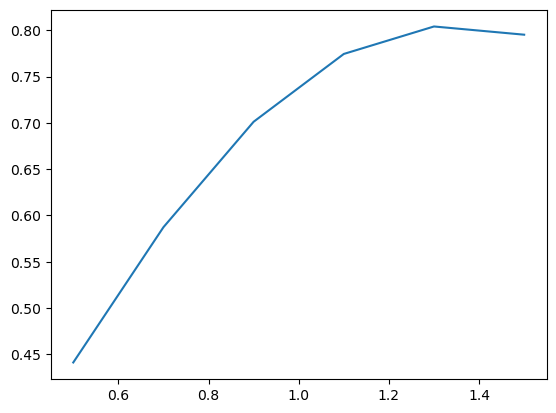

In [121]:
log_delta = np.log(delta_values)
log_m_values = {q: np.log(m) for q, m in m_values.items()}

# Étape 1: Régression de log(m) contre log(delta) pour chaque q
slopes = []
for q in q_values:
    X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
    model = sm.OLS(log_m_values[q], X).fit()
    slopes.append(model.params[1])  # Récupérer le coefficient de pente

plt.plot(q_values, slopes)
# Étape 2: Régression des coefficients (slopes) contre q
X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
model_h = sm.OLS(slopes, X).fit()
H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

print(f"Estimation du coefficient de Hurst, H: {H}")

print(model_h.summary())

# V-Calcul vol via mesure Roger, Satchell and Yoon (1994) (pour prendre en compte un drift non nul)

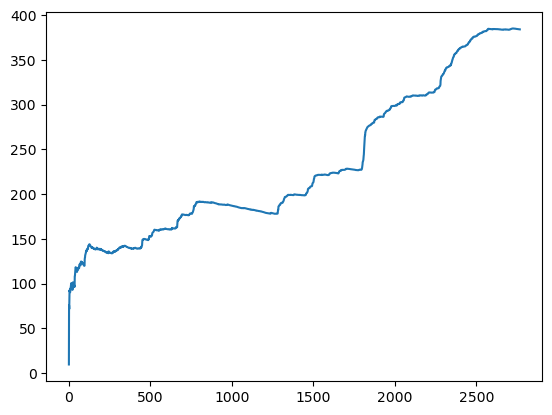

In [122]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['High'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Low'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Close'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Open'] = data['Ouv.'].str.replace('.', '').str.replace(',', '.').astype(float)


data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)


data.set_index('Date', inplace=True)

squared_returns = (data['High']- data['Open'])*(data['High']- data['Close'])+(data['Low']- data['Open'])*(data['Low']- data['Close'])

int_vol = list(squared_returns.cumsum())
n = len(int_vol)
vol_prox = []
for t in range(n):
    vol_prox.append(np.sqrt(int_vol[t]*252/(1+t)))
plt.plot(vol_prox)
vol_5 = pd.DataFrame(list(map(np.log, vol_prox)))

In [123]:
echelles_temps = range(2, 50)
q_values = list(np.linspace(0.5,1.5,6))  # Différentes valeurs de q

m_values = {q: [] for q in q_values}
delta_values = []

for delta in echelles_temps:
    for q in q_values:
        # Calcul de m(q, Delta) pour chaque q et Delta
        mq_delta = np.mean(np.abs(vol_5.diff(periods=delta))**q)
        m_values[q].append(mq_delta)
    
    delta_values.append(delta)

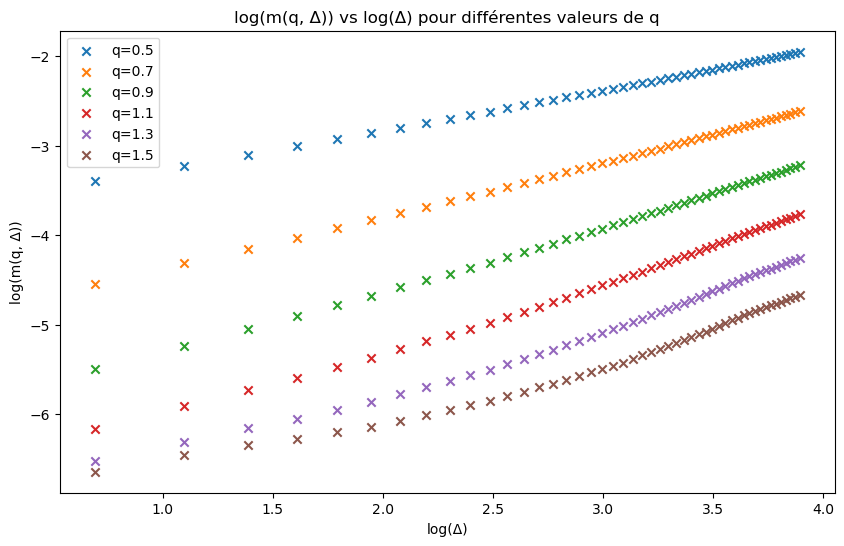

In [124]:
plt.figure(figsize=(10, 6))
for q in q_values:
    plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

plt.xlabel('log(Δ)')
plt.ylabel('log(m(q, Δ))')
plt.title('log(m(q, Δ)) vs log(Δ) pour différentes valeurs de q')
plt.legend()
plt.show()

Estimation du coefficient de Hurst, H: 0.2287578708271587
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3.866
Date:                Wed, 17 Apr 2024   Prob (F-statistic):              0.121
Time:                        15:50:59   Log-Likelihood:                 6.6804
No. Observations:                   6   AIC:                            -9.361
Df Residuals:                       4   BIC:                            -9.777
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/mamba/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


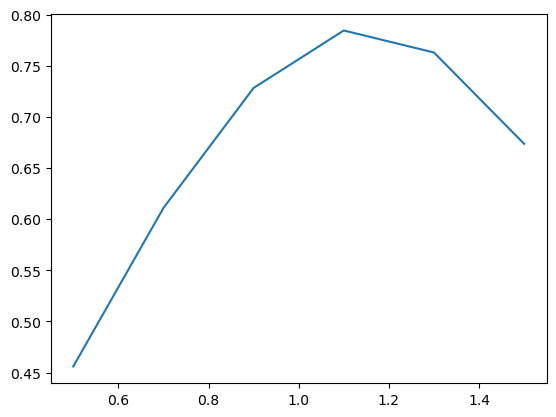

In [125]:
log_delta = np.log(delta_values)
log_m_values = {q: np.log(m) for q, m in m_values.items()}

# Étape 1: Régression de log(m) contre log(delta) pour chaque q
slopes = []
for q in q_values:
    X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
    model = sm.OLS(log_m_values[q], X).fit()
    slopes.append(model.params[1])  # Récupérer le coefficient de pente

plt.plot(q_values, slopes)
# Étape 2: Régression des coefficients (slopes) contre q
X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
model_h = sm.OLS(slopes, X).fit()
H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

print(f"Estimation du coefficient de Hurst, H: {H}")

print(model_h.summary())